<a href="https://colab.research.google.com/github/A24bhi/WALMART-PROJECT/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/Walmart.csv')
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [13]:
df.isnull().sum().sum()

0

In [15]:
df.duplicated().sum()

0

In [19]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [20]:
df.corr()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


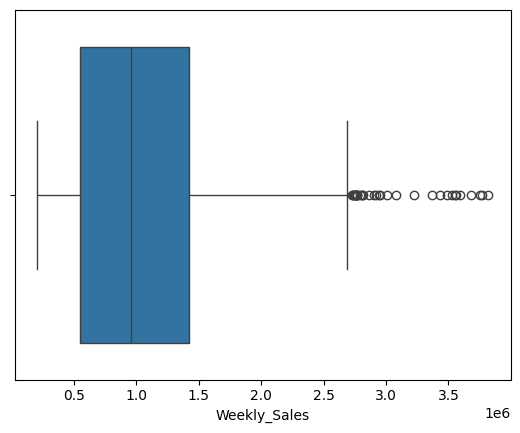

In [22]:
sns.boxplot(data=df, x='Weekly_Sales')
plt.show()

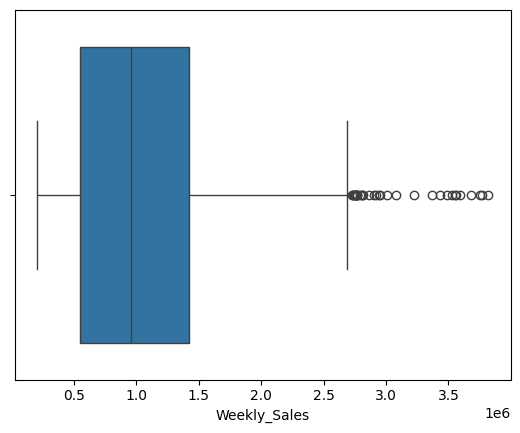

In [27]:

sns.boxplot(data=df, x='Weekly_Sales')
plt.show()

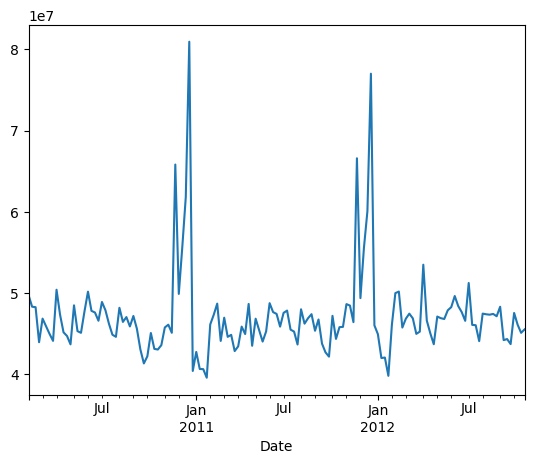

In [32]:
# Plot weekly sales trend
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.show()

In [33]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
store_sales.sort_values(ascending=False)


,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [34]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()


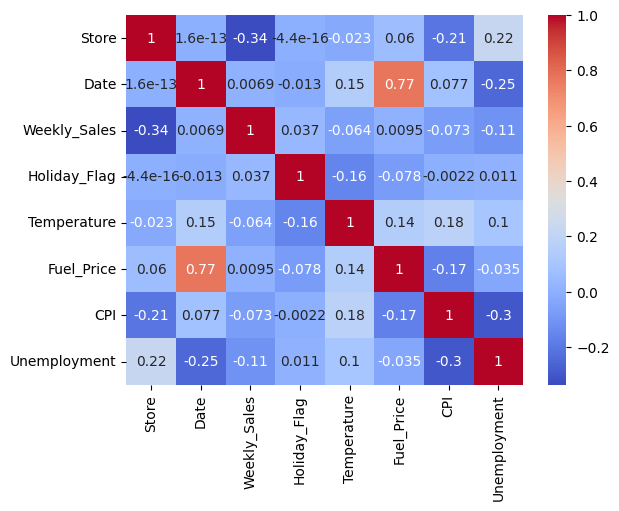

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [36]:
#A

In [37]:
# Grouping by Store and calculating average Weekly_Sales and Unemployment
store_unemployment_sales = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',  # average weekly sales
    'Unemployment': 'mean'   # average unemployment rate
}).reset_index()

# Calculating the correlation between Weekly_Sales and Unemployment for each store
store_unemployment_sales['Correlation'] = store_unemployment_sales.apply(
    lambda row: df[(df['Store'] == row['Store'])]['Weekly_Sales'].corr(df[(df['Store'] == row['Store'])]['Unemployment']), axis=1
)

# Sorting stores based on the strength of correlation (to identify the most affected stores)
store_unemployment_sales = store_unemployment_sales.sort_values(by='Correlation')

# Display the stores with the strongest negative correlation (those suffering the most)
store_unemployment_sales.head(10)  # Top 10 stores most affected by Unemployment


,Store,Weekly_Sales,Unemployment,Correlation
37,38,3.857317e+05,13.116483,-0.785290
43,44,3.027489e+05,6.735622,-0.780076
38,39,1.450668e+06,7.869049,-0.384681
41,42,5.564039e+05,8.362965,-0.356355
40,41,1.268125e+06,6.973378,-0.350630
3,4,2.094713e+06,5.964692,-0.337015
16,17,8.935814e+05,6.549406,-0.263600
2,3,4.027044e+05,7.176986,-0.230413
36,37,5.189003e+05,7.869049,-0.221287
4,5,3.180118e+05,6.295406,-0.207043


In [ ]:
#Store 38: Correlation = -0.785 (strong negative correlation) suffers the most

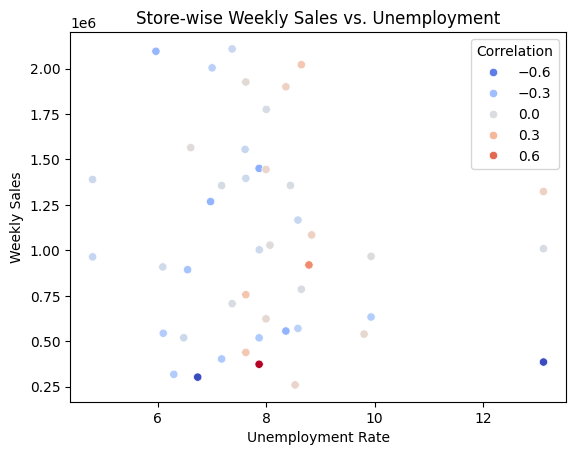

In [38]:

# Plotting the relationship between Unemployment and Weekly Sales for each store
sns.scatterplot(data=store_unemployment_sales, x='Unemployment', y='Weekly_Sales', hue='Correlation', palette='coolwarm')
plt.title('Store-wise Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()


In [39]:
#B b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

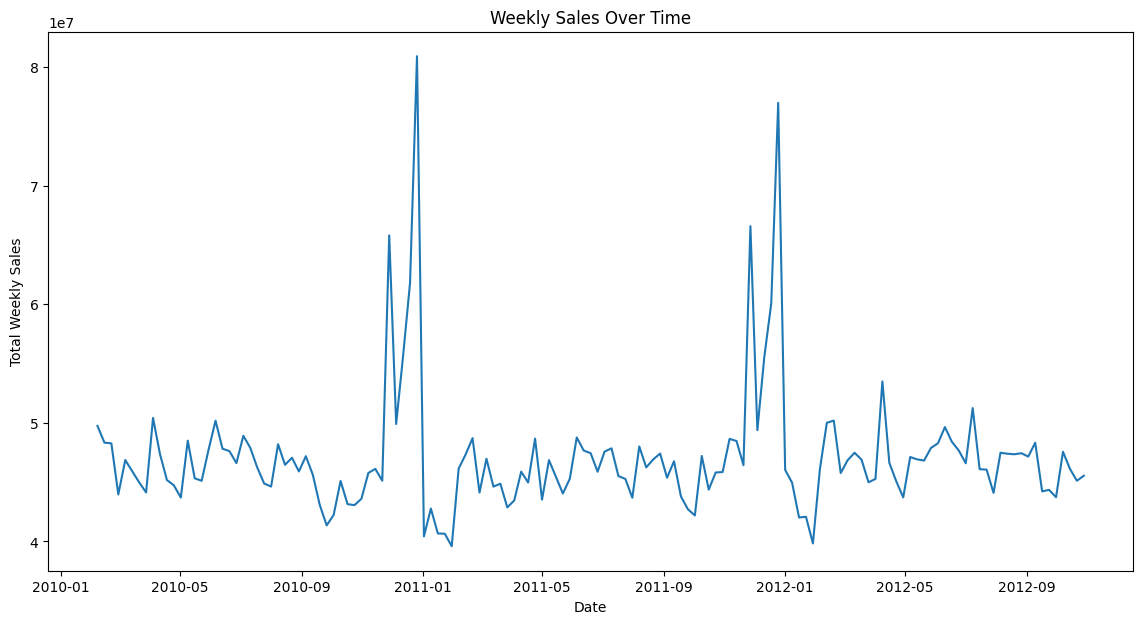

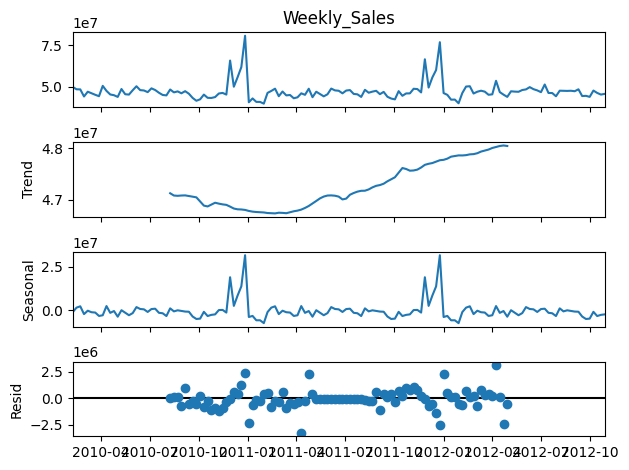

In [41]:

# Set Date as index
df.set_index('Date', inplace=True)

# Aggregate sales by week
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Plot the weekly sales to visualize trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

# Decompose the time series to observe seasonality
decomposition = seasonal_decompose(weekly_sales, model='additive', period=52)
decomposition.plot()
plt.show()


Interpretation:
Seasonal Trend: The decomposition plot will show the seasonal component, revealing any recurring patterns over time.
Reasons for Seasonal Trends:
Holidays: Peaks during holiday seasons (e.g., Thanksgiving, Christmas) could indicate higher sales due to increased shopping.
Weather Patterns: Certain products may sell more during specific seasons, like summer or winter.
Economic Cycles: Changes in consumer behavior due to economic cycles or events.
Conclusion:
If you see consistent peaks during certain weeks or months, it indicates a seasonal trend.
The reason could be related to holidays, promotional periods, or seasonal demand.


In [ ]:
#c. Does temperature affect the weekly sales in any manner?